# 1) Download required files 

In [28]:
%%bash
git clone https://github.com/azzubair01/invoice-dataset.git
mv invoice-dataset/dataset ./
mv invoice-dataset/label_map.pbtxt ./
cd dataset
unzip train.zip
mv train images

Archive:  train.zip
   creating: train/
  inflating: train/Invoice_1.jpg     
  inflating: train/Invoice_10.jpg    
  inflating: train/Invoice_100.jpg   
  inflating: train/Invoice_100_affine_translation.jpg  
  inflating: train/Invoice_100_brightness.jpg  
  inflating: train/Invoice_100_gaussianblur.jpg  
  inflating: train/Invoice_100_horizontallyflip.jpg  
  inflating: train/Invoice_101.jpg   
  inflating: train/Invoice_101_affine_translation.jpg  
  inflating: train/Invoice_101_brightness.jpg  
  inflating: train/Invoice_101_gaussianblur.jpg  
  inflating: train/Invoice_101_horizontallyflip.jpg  
  inflating: train/Invoice_102.jpg   
  inflating: train/Invoice_102_affine_translation.jpg  
  inflating: train/Invoice_102_brightness.jpg  
  inflating: train/Invoice_102_gaussianblur.jpg  
  inflating: train/Invoice_102_horizontallyflip.jpg  
  inflating: train/Invoice_103.jpg   
  inflating: train/Invoice_103_affine_translation.jpg  
  inflating: train/Invoice_103_brightness.jpg  
  in

Cloning into 'invoice-dataset'...


In [29]:
!wget https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
from inferenceutils import *

--2021-02-14 12:22:32--  https://raw.githubusercontent.com/hugozanini/object-detection/master/inferenceutils.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2219 (2.2K) [text/plain]
Saving to: ‘inferenceutils.py’

inferenceutils.py   100%[===================>]   2.17K  --.-KB/s    in 0.007s  

2021-02-14 12:22:33 (307 KB/s) - ‘inferenceutils.py’ saved [2219/2219]



# 2) Extract the saved model

In [30]:
%%bash
unzip saved_model_efficient_d0_optimised.zip

Archive:  saved_model_efficient_d0_optimised.zip
   creating: content/inference_graph/saved_model/
   creating: content/inference_graph/saved_model/assets/
   creating: content/inference_graph/saved_model/variables/
  inflating: content/inference_graph/saved_model/variables/variables.index  
  inflating: content/inference_graph/saved_model/variables/variables.data-00000-of-00001  
  inflating: content/inference_graph/saved_model/saved_model.pb  


# 3) Recall model configurations

In [31]:
output_directory = 'inference_graph'
labelmap_path = 'label_map.pbtxt'

import tensorflow as tf
from object_detection.utils import label_map_util
category_index = label_map_util.create_category_index_from_labelmap(labelmap_path, use_display_name=True)
tf.keras.backend.clear_session()
model = tf.saved_model.load(f'content/{output_directory}/saved_model')

# 4) Select images to be tested

In [32]:
import pandas as pd
test = pd.read_csv('dataset/test_labels.csv')
#Getting 3 random images to test
images = list(test.sample(n=3)['filename'])
images

['Invoice_91.jpg',
 'Invoice_10_gaussianblur.jpg',
 'Invoice_65_affine_translation.jpg']

# 5) Test the detection model

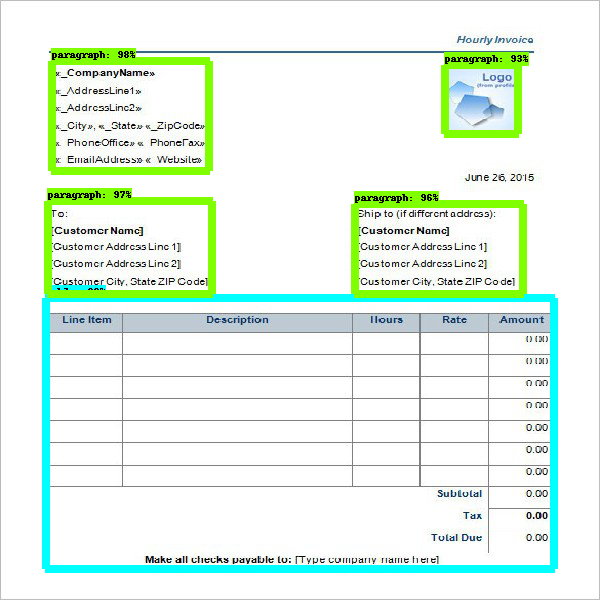

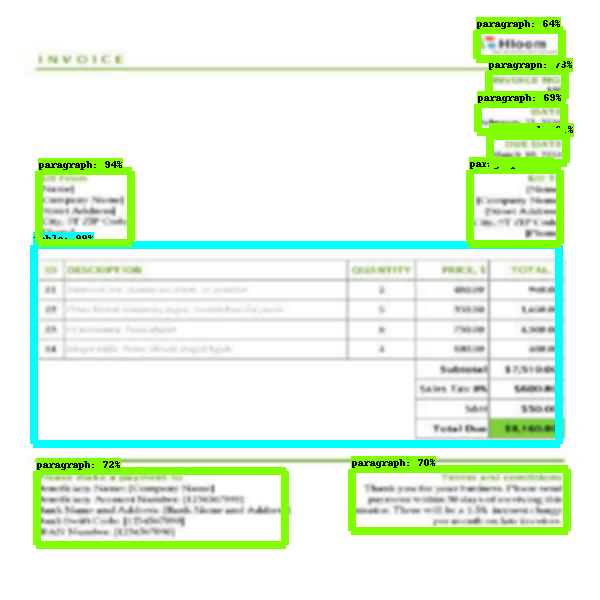

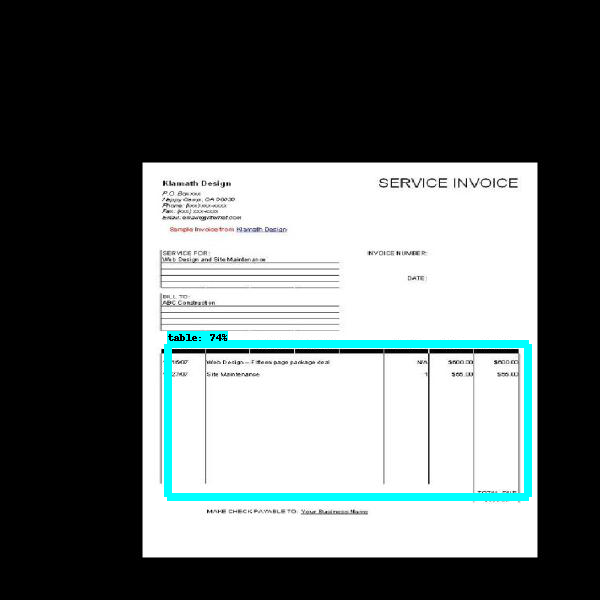

In [33]:
for image_name in images:
    image_np = load_image_into_numpy_array('dataset/images/' + image_name)
    output_dict = run_inference_for_single_image(model, image_np)
    vis_util.visualize_boxes_and_labels_on_image_array(
        image_np,
        output_dict['detection_boxes'],
        output_dict['detection_classes'],
        output_dict['detection_scores'],
        category_index,
        instance_masks=output_dict.get('detection_masks_reframed', None),
        use_normalized_coordinates=True,
        line_thickness=8)
    display(Image.fromarray(image_np))

